In [17]:
%matplotlib inline
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

        A      P
0   17.63  15.98
1   16.84  15.67
2   17.26  15.73
3   19.11  16.26
4   16.82  15.51
5   16.77  15.62
6   17.32  15.91
7   20.71  17.23
8   18.94  16.49
9   17.12  15.55
10  16.53  15.34
11  18.72  16.19
12  20.20  16.89
13  19.57  16.74
14  19.51  16.71
15  18.27  16.09
16  18.88  16.26
17  18.98  16.66
18  21.18  17.21
19  20.88  17.05
20  20.10  16.99
21  18.76  16.20
22  18.81  16.29
23  18.59  16.05
24  18.36  16.52
25  16.87  15.65
26  19.31  16.59
27  18.98  16.57
28  18.17  16.26
29  18.72  16.34
..    ...    ...
40  18.45  16.12
41  19.38  16.72
42  19.13  16.31
43  19.14  16.61
44  20.97  17.25
45  19.06  16.45
46  18.96  16.20
47  19.15  16.45
48  18.89  16.23
49  20.03  16.90
50  20.24  16.91
51  18.14  16.12
52  16.17  15.38
53  18.43  15.97
54  15.99  14.89
55  18.75  16.18
56  18.65  16.41
57  17.98  15.85
58  20.16  17.03
59  17.55  15.66
60  18.30  15.89
61  18.94  16.32
62  15.38  14.90
63  16.16  15.33
64  15.56  14.89
65  15.38  14.66
66  17.36  15.

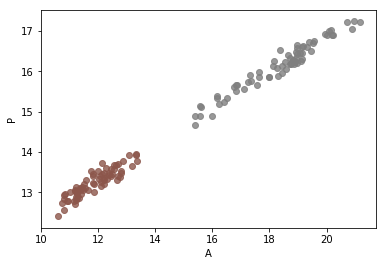

In [18]:
filename = "seeds_dataset_edits2.txt"
seeds_data = pd.read_csv(filename ,sep= "\t",header= None ,index_col= None )
seeds_data2 = pd.read_csv(filename ,sep= "\t",header= None ,index_col= None )
seeds_label = pd.read_csv(filename ,sep= "\t",header= None ,index_col= None )

seeds_data.columns=['A','P','C', 'D', 'E', 'F', 'G', 'H']
seeds_data2.columns=['A','P','C', 'D', 'E', 'F', 'G', 'H']
seeds_label.columns=['A','B','C', 'D', 'E', 'F', 'G', 'H']

seeds_data.drop(['C', 'D', 'E', 'F', 'G', 'H'],axis=1,inplace=True)
seeds_data2.drop(['C', 'D', 'E', 'F', 'G', 'H'],axis=1,inplace=True)
seeds_label.drop(['A','B','C', 'D', 'E', 'F', 'G'],axis=1,inplace=True)

seeds_data.drop(seeds_data.index[70:140], inplace=True)
seeds_data2.drop(seeds_data2.index[0:70], inplace=True)
print(seeds_data)
print(seeds_data2)
print(seeds_label)

NumDataPerClass = 70
# Two-class problem, distinct means, equal covariance matrices
#
X1 = seeds_data
X2 = seeds_data2

sns.regplot(x="A", y="P", data=seeds_data,fit_reg=False,color='tab:gray')
sns.regplot(x="A" , y="P", data=seeds_data2,fit_reg=False,color='tab:brown')

print(X1)
print(X2)

In [19]:
X = np.concatenate((X1, X2), axis=0)
print(X)
O = np.ones((2*NumDataPerClass, 1))
print(O)
X = np.append(X, O, axis=1)
print(X)

[[17.63 15.98]
 [16.84 15.67]
 [17.26 15.73]
 [19.11 16.26]
 [16.82 15.51]
 [16.77 15.62]
 [17.32 15.91]
 [20.71 17.23]
 [18.94 16.49]
 [17.12 15.55]
 [16.53 15.34]
 [18.72 16.19]
 [20.2  16.89]
 [19.57 16.74]
 [19.51 16.71]
 [18.27 16.09]
 [18.88 16.26]
 [18.98 16.66]
 [21.18 17.21]
 [20.88 17.05]
 [20.1  16.99]
 [18.76 16.2 ]
 [18.81 16.29]
 [18.59 16.05]
 [18.36 16.52]
 [16.87 15.65]
 [19.31 16.59]
 [18.98 16.57]
 [18.17 16.26]
 [18.72 16.34]
 [16.41 15.25]
 [17.99 15.86]
 [19.46 16.5 ]
 [19.18 16.63]
 [18.95 16.42]
 [18.83 16.29]
 [18.85 16.17]
 [17.63 15.86]
 [19.94 16.92]
 [18.55 16.22]
 [18.45 16.12]
 [19.38 16.72]
 [19.13 16.31]
 [19.14 16.61]
 [20.97 17.25]
 [19.06 16.45]
 [18.96 16.2 ]
 [19.15 16.45]
 [18.89 16.23]
 [20.03 16.9 ]
 [20.24 16.91]
 [18.14 16.12]
 [16.17 15.38]
 [18.43 15.97]
 [15.99 14.89]
 [18.75 16.18]
 [18.65 16.41]
 [17.98 15.85]
 [20.16 17.03]
 [17.55 15.66]
 [18.3  15.89]
 [18.94 16.32]
 [15.38 14.9 ]
 [16.16 15.33]
 [15.56 14.89]
 [15.38 14.66]
 [17.36 15

In [20]:
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))

In [21]:
rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex]
yr = y[rIndex]

# Training and test sets (half half)
#
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;

(70, 3) (70,) (70, 3) (70,)


In [22]:
def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput, weights) > 0):
            nCorrect +=1
    return 100*nCorrect/N

In [23]:
# Perceptron learning loop
#
# Random initialization of weights
#
w = np.random.randn(3)
print(w)
# What is the performance with the initial random weights?
#
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, y_train, w)))
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=2000
# Learning rate (change this to see convergence changing)
#
alpha = 0.002
# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop
#
for iter in range(MaxIter):
    # Select a data item at random
    #
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    x = X_train[r,:]
    # If it is misclassified, update weights
    #
    if (y_train[r] * np.dot(x, w) < 0):
        w += alpha * y_train[r] * x
    # Evaluate trainign and test performances for plotting
    #
    P_train[iter] = PercentCorrect(X_train, y_train, w);
    P_test[iter] = PercentCorrect(X_test, y_test, w);
print('Percentage Correct After Training: %6.2f %6.2f'
%(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))
print(w)

[-0.87991508 -0.38369161 -0.90036202]
Initial Percentage Correct:  50.00
Percentage Correct After Training: 100.00 100.00
[ 0.00632492  0.05522839 -0.89436202]


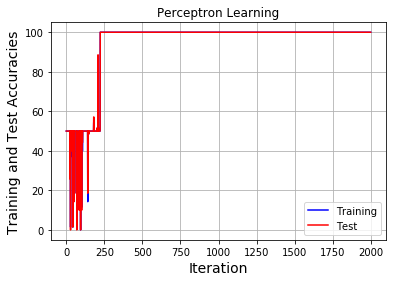

In [24]:
#[-0.14043664  0.02003463  0.74557092]
#[-1.16422297e-02  9.57280864e-06  6.33728851e-02]
#[-0.04480969  0.00224025  0.23625976]
#[-0.0039641  -0.05050924  0.31516624]
#[-0.20939909  0.05022049  1.09738041]
#[-0.03346942  0.0023207   0.18889889]
#[-0.01248589 -0.00406996  0.10411917]
#[-0.01020045 -0.02065987  0.18735582]
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')